# 2 Gaussian Processes

In this work-sheet we will look at Gaussian processes or GPs. These are non-parametric models that allows us to reason not about parameters of the function that we want to infer but in terms of more interpretable components as the characteristics of the function.

## 2.1 Prior

The first thing we want to implement is a function that allows us to compute the covariance matrix.

In [2]:
from scipy.spatial.distance import cdist

def rbf_kernel(x1, x2, varSigma, lengthscale):
    if x2 is None:
        d = cdist(x1, x1)
    else:
        d = cdist(x1, x2)

    K = varSigma*np.exp(-np.power(d, 2)/lengthscale)
    return K

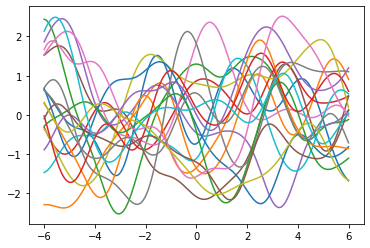

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# choose index set for the marginal
x = np.linspace(-6, 6, 200).reshape(-1, 1) # compute covariance matrix
K = rbf_kernel(x, None, 1.0, 2.0)
# create mean vector
mu = np.zeros(len(x))

# draw samples 20 from Gaussian distribution
f = np.random.multivariate_normal(mu, K, 20)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, f.T)

Now lets try to change the covariance function and see how the samples change, lets implement three more covariance functions, a white-noise, a linear and a periodic covariance.

In [11]:
def lin_kernel(x1, x2, varSigma):
    if x2 is None:
        return varSigma*x1.dot(x1.T)
    else:
        return varSigma*x1.dot(x2.T)


def white_kernel(x1, x2, varSigma):
    if x2 is None:
        return varSigma*np.eye(x1.shape[0])
    else:
        return np.zeros(x1.shape[0], x2.shape[0])


def periodic_kernel(x1, x2, varSigma, period, lenthScale):
    if x2 is None:
        d = cdist(x1, x1)
    else:
        d = cdist(x1, x2)
    return varSigma*np.exp(-(2*np.sin((np.pi/period)*np.sqrt(d))**2)/lengthScale**2)

## 2.2 Posterior

Now let us generate some data and sample from this distribution. Lets generate some data from a noisy sine wave.

In [13]:
N=5
x = np.linspace(-3.1,3,N)
y = np.sin(2*np.pi/x) + x*0.1 + 0.3*np.random.randn(x.shape[0])
x = np.reshape(x,(-1,1))
y = np.reshape(y,(-1,1))
x_star = np.linspace(-6, 6, 500)

Now we are likely to use compute the posterior quite a few times for different index-sets so its probably worthwhile to dedicate a function for this. Something like the one below would probably be suitable.

In [20]:
def gp_prediction(x1, y1, xstar, lengthScale, varSigma, noise):
    k_starX = rbf_kernel(xstar,x1,lengthScale,varSigma)#,noise)
    k_xx = rbf_kernel(x1, None, lengthScale, varSigma)#, noise)
    k_starstar = rbf_kernel(xstar,None,lengthScale,varSigma)#,noise)

    mu = k_starX.dot(np.linalg.inv(k_xx)).dot(y1)
    var = k_starstar - (k_starX).dot(np.linalg.inv(k_xx)).dot(k_starX.T)
    
    return mu, var, xstar

Once we have the the functionality to compute predictive posterior we can now sample from this.

In [21]:
Nsamp = 100
mu_star, var_star, x_star = gp_prediction(x, y, x_star, 2, 1, 1)
fstar = np.random.multivariate_normal(mu_star, var_star, Nsamp)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x_star, f_star.T)
ax.scatter(x1, y1, 200, 'k', '*', zorder=2)

ValueError: XA must be a 2-dimensional array.

The previous errors are made in the lab worksheet (delivered by professor).